In [2]:
!python.exe -m pip install --upgrade pip
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap

In [24]:
testPath = './ExpPatch-Pics/ExpPatchPics-Processed'

# Don't include animation directory 
picDirs = os.listdir(testPath)[1:]
countBySurvey = {}
SurveyPatchFreq = {}

# Count the types
# Open each survey directory
for picDir in picDirs:
    # read all files in directory that are xls to get the count
    typesInCurrDir = {}
    patchCounts = {}
    for file in os.listdir(testPath + '/' + picDir):
        if file.endswith('.xls'):
            xlsPath = testPath + "/" + picDir + "/" + file
            df = pd.read_csv(xlsPath, delimiter='\t')
            dfn = pd.read_csv(xlsPath)
            patchTotalCount = 0
        
            colList = dfn.columns[0].split('\t')[1:]
            valList = dfn.values[0][0].split('\t')[1:len(colList)+1]
            for cidx, col in enumerate(colList):
                counts = int(valList[cidx])
                patchTotalCount += counts
                print(counts)
                if col in typesInCurrDir:
                    typesInCurrDir[col] += counts
                else:
                    typesInCurrDir[col] = counts
                        
            patchName = file[14:-4]
            patchCounts[patchName] =   patchTotalCount 
            # Working on survey to patch to counts
            # patchCounts[patchName] = 
                        
    # save types for current survey dir
    countBySurvey[picDir] = typesInCurrDir
    SurveyPatchFreq[picDir] = patchCounts

4
23
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
122
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-ABq1.xls
5
12
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
66
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-ABq2.xls
0
4
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
52
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-ABq3.xls
3
29
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
49
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-ABq4.xls
1
7
0
0
0
0
0
0
0
0
0
0
4
0
0
0
0
0
49
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-ABq5.xls
0
9
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
60
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-ABq6.xls
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
47
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-ABq7.xls
0
8
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
23

14
16
4
6
0
0
12
7
0
0
0
15
14
0
2
0
0
0
48
0
0
0
2
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-BBq1.xls
9
43
0
0
0
0
0
0
0
1
8
1
6
0
0
0
0
0
43
0
0
0
2
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-BBq2.xls
7
17
4
3
0
0
2
9
0
0
0
3
2
0
1
1
0
0
36
0
0
0
4
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-BBq3.xls
17
27
8
6
0
0
0
5
2
0
0
2
2
0
4
1
0
0
22
0
0
0
2
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-BBq4.xls
24
22
3
1
0
0
0
0
0
0
0
3
0
0
0
0
0
0
16
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-BBq5.xls
14
35
1
2
0
0
0
8
0
0
0
1
3
0
0
3
0
0
20
0
0
0
1
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-BBq6.xls
24
19
0
0
0
0
0
0
3
0
0
5
0
0
0
0
0
0
16
0
0
0
2
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-07-20_Survey_00_P/2013-07-20_YB-BBq7.xls
41
24
0
0
0
0
0
0
0
0
0
6
15
0
5


0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
6
0
0
1
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-ABq7.xls
0
0
0
0
0
0
8
0
31
8
0
3
5
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-ABq8.xls
0
0
0
0
0
0
0
0
12
0
0
1
9
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-ABq9.xls
0
0
0
0
0
0
0
0
0
0
0
23
111
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-ACq1.xls
0
0
0
0
0
0
0
0
0
0
0
0
47
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-ACq2.xls
0
0
0
0
0
0
0
0
0
0
0
0
9
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-ACq3.xls
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-ACq4.xls
0
0
0
0
0
0
2
0
0
0
0
2
5
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics

0
0
0
0
0
0
0
0
1
1
0
2
19
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-Eq8.xls
0
0
0
0
0
0
11
0
0
0
0
1
4
0
0
0
0
0
3
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-Fq1.xls
0
0
0
0
0
0
0
0
0
0
0
3
15
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-Fq4.xls
0
0
0
0
0
0
0
0
0
0
0
0
11
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-Fq5.xls
0
0
0
0
0
0
0
0
0
0
0
2
11
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-Fq6.xls
0
0
0
0
0
0
0
0
0
0
0
3
14
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-Fq7.xls
0
0
0
0
0
0
0
0
6
0
0
2
64
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-08-19_Survey_01_P/2013-08-19_YB-Gq3.xls
0
0
0
0
0
0
0
0
1
0
0
0
17
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
11
57
0
0
0
0
0
0
0
0
0
1
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-09-16_Survey_02_P/2013-09-16_YB-Cq2.xls
0
0
0
0
0
0
15
0
0
0
0
7
15
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-09-16_Survey_02_P/2013-09-16_YB-Cq4.xls
0
0
0
0
0
0
267
0
0
1
0
1
45
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-09-16_Survey_02_P/2013-09-16_YB-Cq5.xls
0
0
0
0
0
0
0
0
0
0
0
5
45
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-09-16_Survey_02_P/2013-09-16_YB-Cq6.xls
0
0
0
0
0
0
29
0
7
0
0
16
62
./ExpPatch-Pics/ExpPatchPics-Processed/2013-09-16_Survey_02_P/2013-09-16_YB-Dq3.xls
0
0
0
0
0
0
56
0
0
0
0
4
88
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-09-16_Survey_02_P/2013-09-16_YB-Dq4.xls
0
0
0
0
0
0
93
0
0
0
0
59
169
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-09-16_Survey_02_P/2013-09-16_YB-Dq5.xls
0
0
0
0
0
0
135
0
0
0
0
10
9
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-

0
0
0
0
0
0
248
0
0
0
0
439
217
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-10-07_Survey_03_P/2013-10-07_YB-Fq4.xls
0
0
0
0
0
0
509
0
0
0
0
252
137
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-10-07_Survey_03_P/2013-10-07_YB-Fq5.xls
0
0
0
0
0
0
202
0
0
0
0
105
62
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-10-07_Survey_03_P/2013-10-07_YB-Fq6.xls
0
0
0
0
0
0
76
0
0
0
0
1
69
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-10-07_Survey_03_P/2013-10-07_YB-Fq7.xls
0
0
0
0
0
0
0
0
0
0
0
3
41
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-10-07_Survey_03_P/2013-10-07_YB-Gq3.xls
0
0
0
0
0
0
0
0
2
0
0
175
190
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-10-07_Survey_03_P/2013-10-07_YB-Gq5.xls
0
0
0
0
0
0
1080
0
1
0
0
5
40
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-10-07_Survey_03_P/2013-10-07_YB-Gq8.xls
0
0
0
0
0
0
282
0
1


466
2
0
0
0
0
221
0
0
0
0
55
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-11-05_Survey_04_P/2013-11-05_YB-Bq6.xls
93
1
0
0
0
0
26
0
0
0
4
123
18
1
0
0
4
1
./ExpPatch-Pics/ExpPatchPics-Processed/2013-11-05_Survey_04_P/2013-11-05_YB-Bq7.xls
467
2
0
0
0
0
568
0
1
0
0
53
15
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-11-05_Survey_04_P/2013-11-05_YB-Bq8.xls
704
0
0
0
0
0
595
0
0
0
3
191
4
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-11-05_Survey_04_P/2013-11-05_YB-Bq9.xls
0
0
0
0
0
0
646
0
0
0
0
6
45
0
0
0
0
0
0
0
0
0
2
./ExpPatch-Pics/ExpPatchPics-Processed/2013-11-05_Survey_04_P/2013-11-05_YB-Cq2.xls
0
0
0
0
0
0
732
0
0
0
0
3
20
0
0
0
0
0
0
0
0
0
4
./ExpPatch-Pics/ExpPatchPics-Processed/2013-11-05_Survey_04_P/2013-11-05_YB-Cq4.xls
0
0
0
0
0
0
330
0
0
0
0
0
77
0
0
0
0
0
0
0
0
0
4
./ExpPatch-Pics/ExpPatchPics-Processed/2013-11-05_Survey_04_P/2013-11-05_YB-Cq6.xls
0
0
0
0
0
0
0
0
1
0
0
13
306
0
228
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-11-05_Survey_04_P/2013-11-05_YB-Dq3.

0
0
0
0
0
0
283
0
0
0
0
151
20
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-12-03_Survey_05_P/2013-12-03_YB-Bq6.xls
676
0
0
0
0
0
205
0
0
0
5
164
6
1
0
0
12
./ExpPatch-Pics/ExpPatchPics-Processed/2013-12-03_Survey_05_P/2013-12-03_YB-Bq7.xls
0
0
0
0
0
0
348
0
0
0
0
178
11
0
0
0
2
./ExpPatch-Pics/ExpPatchPics-Processed/2013-12-03_Survey_05_P/2013-12-03_YB-Bq8.xls
1467
25
0
0
0
0
844
0
1
0
3
300
0
0
0
0
1
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-12-03_Survey_05_P/2013-12-03_YB-Bq9.xls
0
0
0
0
0
0
693
0
0
0
0
33
33
./ExpPatch-Pics/ExpPatchPics-Processed/2013-12-03_Survey_05_P/2013-12-03_YB-Cq2.xls
0
0
0
0
0
0
442
0
0
0
0
43
23
0
0
0
0
0
0
0
0
0
2
./ExpPatch-Pics/ExpPatchPics-Processed/2013-12-03_Survey_05_P/2013-12-03_YB-Cq4.xls
0
0
0
0
0
0
271
0
0
0
0
85
29
0
0
0
0
0
0
0
0
0
2
./ExpPatch-Pics/ExpPatchPics-Processed/2013-12-03_Survey_05_P/2013-12-03_YB-Cq6.xls
0
0
0
0
0
0
0
0
3
0
0
43
152
0
1144
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2013-12-03_Survey_05_P/2013-12-03_YB-Dq3.xls

0
0
0
0
0
0
238
0
0
0
0
5
18
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-01-29_Survey_06_P/2014-01-29_YB-Eq3.xls
0
0
0
0
0
0
370
0
0
0
0
6
26
0
0
0
0
0
0
0
0
0
0
0
0
1
./ExpPatch-Pics/ExpPatchPics-Processed/2014-01-29_Survey_06_P/2014-01-29_YB-Eq4.xls
0
0
0
0
0
0
480
0
0
0
0
8
43
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-01-29_Survey_06_P/2014-01-29_YB-Eq8.xls
0
0
0
0
0
0
623
0
0
0
0
488
388
0
0
0
0
0
0
0
0
0
4
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-01-29_Survey_06_P/2014-01-29_YB-Fq4.xls
0
0
0
0
0
0
874
0
0
0
0
1036
462
0
0
0
0
0
0
0
0
0
1
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-01-29_Survey_06_P/2014-01-29_YB-Fq5.xls
0
0
0
0
0
0
359
0
0
0
0
813
295
0
0
0
0
0
0
0
0
0
1
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-01-29_Survey_06_P/2014-01-29_YB-Fq6.xls
520
0
158
0
0
0
1600
0
0
0
0
15
25
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-01-29_Survey_06_P/2014-01-29_YB-Gq3.xls
1952
4
6
0


0
0
0
0
0
0
106
0
0
0
0
35
7
1
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-02-26_Survey_07_P/2014-02-26_YB-Bq6.xls
635
11
0
0
4
0
23
0
0
0
19
59
38
5
0
0
10
./ExpPatch-Pics/ExpPatchPics-Processed/2014-02-26_Survey_07_P/2014-02-26_YB-Bq7.xls
0
0
0
0
0
0
125
0
0
0
0
24
11
0
95
0
2
./ExpPatch-Pics/ExpPatchPics-Processed/2014-02-26_Survey_07_P/2014-02-26_YB-Bq8.xls
0
0
0
0
0
0
143
0
0
0
4
55
16
0
0
0
6
./ExpPatch-Pics/ExpPatchPics-Processed/2014-02-26_Survey_07_P/2014-02-26_YB-Bq9.xls
0
0
0
0
0
0
7
0
0
0
0
108
16
0
381
./ExpPatch-Pics/ExpPatchPics-Processed/2014-02-26_Survey_07_P/2014-02-26_YB-Cq2.xls
0
0
0
0
0
0
0
0
0
0
0
154
10
0
308
./ExpPatch-Pics/ExpPatchPics-Processed/2014-02-26_Survey_07_P/2014-02-26_YB-Cq4.xls
0
0
0
0
0
0
0
0
0
0
0
146
0
0
178
1
./ExpPatch-Pics/ExpPatchPics-Processed/2014-02-26_Survey_07_P/2014-02-26_YB-Cq6.xls
0
0
0
0
0
0
0
0
1
0
0
132
137
0
316
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-02-26_Survey_07_P/2014-02-26_YB-Dq3.xls
2673
16
0


0
0
0
0
0
0
408
0
0
0
0
548
255
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-01_Survey_08_P/2014-04-01_YB-Fq4.xls
0
0
0
0
0
0
316
0
0
0
1
409
191
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-01_Survey_08_P/2014-04-01_YB-Fq5.xls
0
0
0
0
0
0
369
0
0
0
1
588
197
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-01_Survey_08_P/2014-04-01_YB-Fq6.xls
303
1
579
0
0
0
687
0
0
0
0
15
85
0
56
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-01_Survey_08_P/2014-04-01_YB-Gq3.xls
1263
34
7
0
0
0
265
0
1
0
28
137
50
0
633
0
63
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-01_Survey_08_P/2014-04-01_YB-Gq5.xls
1071
27
286
2
0
0
767
0
2
0
0
9
52
0
113
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-01_Survey_08_P/2014-04-01_YB-Gq8.xls
674
21
0
0
0
0
20
0
2
0
39
44
23
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-29_Survey_09_P/2014-04-29_YB-ABq1.xls
0
0
0
0
0

0
0
0
0
0
0
623
0
1
0
0
8
89
0
30
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-29_Survey_09_P/2014-04-29_YB-Eq4.xls
2027
28
0
0
0
0
991
0
2
0
3
27
107
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-29_Survey_09_P/2014-04-29_YB-Eq8.xls
0
0
0
0
0
0
532
0
0
0
1
584
210
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-29_Survey_09_P/2014-04-29_YB-Fq4.xls
0
0
0
0
0
0
402
0
0
0
2
643
204
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-29_Survey_09_P/2014-04-29_YB-Fq5.xls
0
0
0
0
0
0
0
0
0
0
1
704
154
0
414
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-29_Survey_09_P/2014-04-29_YB-Fq6.xls
441
1
81
0
0
0
1070
0
1
1
2
37
104
0
148
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-29_Survey_09_P/2014-04-29_YB-Gq3.xls
821
39
4
0
0
0
0
0
14
0
24
74
75
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-04-29_Survey_09_P/2014-04-29_YB-Gq5.xls

1639
10
0
0
0
0
47
0
16
1
0
19
315
0
12
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-06-24_Survey_11_P/2014-06-24_YB-AFq8.xls
1482
3
0
0
0
0
88
0
25
0
0
152
274
0
1
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-06-24_Survey_11_P/2014-06-24_YB-AFq9.xls
0
0
0
0
0
0
0
0
3
0
0
71
493
0
149
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-06-24_Survey_11_P/2014-06-24_YB-AGq1.xls
0
0
0
0
0
0
0
0
4
0
0
43
632
0
181
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-06-24_Survey_11_P/2014-06-24_YB-AGq2.xls
0
0
0
0
0
0
0
0
7
0
0
59
454
0
250
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-06-24_Survey_11_P/2014-06-24_YB-AGq3.xls
0
0
0
0
0
0
459
0
4
0
0
113
386
0
5
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-06-24_Survey_11_P/2014-06-24_YB-AGq7.xls
0
0
0
0
1
0
413
0
7
0
0
133
304
0
5
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-06-24_Survey_11_P/2014-06-24_YB-AGq9.xls
397
36
0
0
0
0
61
0

0
0
0
0
0
0
0
0
8
0
6
33
63
0
677
0
0
0
0
0
0
0
0
0
0
8
./ExpPatch-Pics/ExpPatchPics-Processed/2014-07-24_Survey_12_P/2014-07-24_YB-Aq7.xls
0
0
0
0
0
1
743
0
27
12
15
135
113
4
498
2
0
0
0
0
0
0
0
2
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-07-24_Survey_12_P/2014-07-24_YB-Aq9.xls
0
0
0
0
0
0
0
0
19
85
33
328
11
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-07-24_Survey_12_P/2014-07-24_YB-Bq1.xls
0
0
0
0
0
0
0
0
15
16
17
494
14
0
37
0
0
0
0
0
0
0
0
0
0
22
./ExpPatch-Pics/ExpPatchPics-Processed/2014-07-24_Survey_12_P/2014-07-24_YB-Bq5.xls
0
0
0
0
1
0
0
0
26
70
2
357
5
0
0
0
0
0
0
0
0
0
0
0
0
26
./ExpPatch-Pics/ExpPatchPics-Processed/2014-07-24_Survey_12_P/2014-07-24_YB-Bq6.xls
329
7
2
0
0
0
0
0
11
1
37
94
11
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-07-24_Survey_12_P/2014-07-24_YB-Cq2.xls
320
0
2
0
0
0
0
0
0
1
56
18
3
./ExpPatch-Pics/ExpPatchPics-Processed/2014-07-24_Survey_12_P/2014-07-24_YB-Cq4.xls
0
0
0
0
0
0
0
0
5
1
33
142
17
2
./ExpPatch-Pics/ExpPat

835
0
0
0
0
0
0
0
13
0
0
185
208
0
444
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-09-07_Survey_13_P/2014-09-07_YB-BCq5.xls
0
0
0
0
0
0
0
0
8
0
0
88
102
0
262
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-09-07_Survey_13_P/2014-09-07_YB-BCq9.xls
198
0
4
0
0
0
22
0
4
0
119
232
185
0
133
0
1
0
0
0
0
0
0
0
0
3
./ExpPatch-Pics/ExpPatchPics-Processed/2014-09-07_Survey_13_P/2014-09-07_YB-BDq1.xls
199
2
0
0
0
0
22
0
7
0
204
171
99
1
229
2
0
0
0
0
0
0
0
0
0
2
./ExpPatch-Pics/ExpPatchPics-Processed/2014-09-07_Survey_13_P/2014-09-07_YB-BDq5.xls
1092
10
13
0
0
0
0
0
7
1
138
251
128
0
240
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-09-07_Survey_13_P/2014-09-07_YB-BDq7.xls
0
0
0
0
0
0
177
0
0
0
0
38
192
0
4
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-09-07_Survey_13_P/2014-09-07_YB-BEq2.xls
0
0
0
0
0
0
10
0
4
0
0
326
227
0
4
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-09-07_Survey_13_P/2014-09-07

0
0
0
0
0
0
0
0
17
23
20
424
13
12
./ExpPatch-Pics/ExpPatchPics-Processed/2014-10-13_Survey_14_P/2014-10-13_YB-Bq5.xls
0
0
0
0
1
0
0
0
6
6
9
572
12
11
./ExpPatch-Pics/ExpPatchPics-Processed/2014-10-13_Survey_14_P/2014-10-13_YB-Bq6.xls
0
0
0
0
0
0
0
0
2
7
35
394
3
13
91
0
3
1
./ExpPatch-Pics/ExpPatchPics-Processed/2014-10-13_Survey_14_P/2014-10-13_YB-Cq2.xls
0
0
0
0
1
0
0
0
0
5
14
325
3
8
108
0
1
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-10-13_Survey_14_P/2014-10-13_YB-Cq4.xls
0
0
0
0
0
0
0
0
0
5
13
404
0
9
108
1
0
0
0
0
0
0
0
0
0
16
./ExpPatch-Pics/ExpPatchPics-Processed/2014-10-13_Survey_14_P/2014-10-13_YB-Cq6.xls
310
6
0
0
0
0
0
0
1
0
12
86
26
8
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-10-13_Survey_14_P/2014-10-13_YB-Dq3.xls
0
0
0
0
0
0
314
0
0
0
1
56
99
0
127
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-10-13_Survey_14_P/2014-10-13_YB-Dq4.xls
0
0
0
0
0
0
50
0
0
0
4
471
171
3
380
0
2
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Pr

282
0
77
0
0
0
117
0
1
0
0
35
53
0
55
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-11-04_Survey_15_P/2014-11-04_YB-Eq3.xls
416
3
0
0
0
0
287
0
0
19
0
2
45
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-11-04_Survey_15_P/2014-11-04_YB-Eq4.xls
91
0
448
0
0
0
728
0
4
12
114
121
97
0
24
0
1
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-11-04_Survey_15_P/2014-11-04_YB-Eq8.xls
1399
10
7
0
0
0
66
0
1
0
0
437
477
4
717
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-11-04_Survey_15_P/2014-11-04_YB-Fq4.xls
739
4
39
0
1
0
85
0
1
0
0
186
304
12
665
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-11-04_Survey_15_P/2014-11-04_YB-Fq5.xls
973
13
0
0
0
0
59
0
3
0
0
244
309
11
507
0
1
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-11-04_Survey_15_P/2014-11-04_YB-Fq6.xls
421
0
4
0
0
0
560
1
1
4
9
12
27
0
150
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2014-11-04_Survey_15_P/201

2805
354
29
0
0
0
318
0
0
0
0
2
0
0
149
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-01-18_Survey_17_P/2015-01-18_YB-AFq8.xls
1222
3
0
0
1
0
780
0
1
0
0
7
72
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-01-18_Survey_17_P/2015-01-18_YB-AFq9.xls
1320
0
0
0
0
0
0
0
1
0
4
242
112
0
305
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-01-18_Survey_17_P/2015-01-18_YB-AGq2.xls
1018
3
19
0
0
4
613
0
2
0
4
33
122
0
219
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-01-18_Survey_17_P/2015-01-18_YB-AGq7.xls
615
2
0
0
1
0
628
0
3
1
81
60
136
4
219
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-01-18_Survey_17_P/2015-01-18_YB-AGq9.xls
254
49
71
0
3
0
85
0
0
0
18
11
2
0
111
./ExpPatch-Pics/ExpPatchPics-Processed/2015-01-18_Survey_17_P/2015-01-18_YB-Aq6.xls
627
37
34
2
0
0
28
0
1
0
83
123
24
88
239
1
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-01-18_Survey_17_P/2015-01-18_YB-Aq7.xls
660
38
66
0
0
0
29
0
4
1
8

874
175
139
13
4
1
750
2
3
0
1117
328
255
6
355
1
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-02-17_Survey_18_P/2015-02-17_YB-BDq7.xls
668
19
0
0
0
0
38
0
0
0
0
47
367
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-02-17_Survey_18_P/2015-02-17_YB-BEq2.xls
635
123
109
1
0
1
4
0
0
0
13
74
209
0
153
0
1
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-02-17_Survey_18_P/2015-02-17_YB-BEq3.xls
1408
255
282
5
1
0
0
0
1
0
11
122
286
0
152
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-02-17_Survey_18_P/2015-02-17_YB-BEq6.xls
809
113
176
2
2
0
0
0
1
0
75
134
234
8
324
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-02-17_Survey_18_P/2015-02-17_YB-BFq1.xls
1094
170
105
0
1
0
0
0
5
0
17
126
343
0
152
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-02-17_Survey_18_P/2015-02-17_YB-BFq4.xls
577
271
0
0
0
0
1189
0
1
0
355
82
487
1
1007
2
12
0
0
0
1
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Pro

36
16
11
0
0
0
0
0
42
0
502
41
45
20
204
3
18
0
0
0
0
0
0
1
./ExpPatch-Pics/ExpPatchPics-Processed/2015-04-19_Survey_20_P/2015-04-19_YB-ABq2.xls
147
27
69
2
7
0
0
0
62
0
377
196
59
15
113
0
47
0
0
0
0
0
0
0
0
7
./ExpPatch-Pics/ExpPatchPics-Processed/2015-04-19_Survey_20_P/2015-04-19_YB-ABq4.xls
0
0
0
0
2
0
0
0
7
0
0
169
1156
5
399
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-04-19_Survey_20_P/2015-04-19_YB-ACq4.xls
0
0
0
0
5
0
0
0
11
0
6
84
965
0
315
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-04-19_Survey_20_P/2015-04-19_YB-ACq7.xls
225
136
17
1
0
0
0
0
34
0
114
126
486
6
149
0
0
0
0
0
0
0
1
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-04-19_Survey_20_P/2015-04-19_YB-ACq8.xls
141
15
43
6
0
0
0
0
26
4
236
121
101
9
88
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-04-19_Survey_20_P/2015-04-19_YB-ADq1.xls
117
20
9
0
0
2
0
0
53
0
488
52
26
14
188
1
1
0
0
0
0
0
1
./ExpPatch-Pics/ExpPatchPics-Processed/2015-04-19_Survey_20_P/2015-04-19_YB-ADq5.xls
154
59
44
1
4
0
0
0
14
1
84
72
28
4

570
3
69
0
0
0
22
0
19
3
368
455
34
65
0
0
2
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-05-18_Survey_21_P/2015-05-18_YB-Aq9.xls
74
4
24
1
2
0
62
0
7
0
4
83
177
0
32
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-05-18_Survey_21_P/2015-05-18_YB-BBq1.xls
94
0
14
0
0
0
87
0
25
0
29
42
158
0
24
0
1
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-05-18_Survey_21_P/2015-05-18_YB-BBq2.xls
273
11
53
0
1
0
33
0
25
0
6
89
227
0
22
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-05-18_Survey_21_P/2015-05-18_YB-BBq9.xls
412
0
370
0
1
0
89
0
15
0
4
143
279
0
63
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-05-18_Survey_21_P/2015-05-18_YB-BCq3.xls
219
4
2
0
0
0
38
0
7
0
0
67
218
1
23
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-05-18_Survey_21_P/2015-05-18_YB-BCq5.xls
360
12
105
0
1
0
21
0
17
1
36
194
163
0
34
0
4
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-05-18_Survey_21

13
0
4
0
0
0
2
0
4
0
1010
39
56
0
1
0
4
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-06-15_Survey_22_P/2015-06-15_YB-Eq8.xls
689
17
438
0
0
0
21
0
10
0
0
452
230
7
3
0
3
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-06-15_Survey_22_P/2015-06-15_YB-Fq4.xls
297
5
121
0
4
0
18
0
21
0
0
534
250
19
39
0
0
0
0
0
0
0
0
0
2
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-06-15_Survey_22_P/2015-06-15_YB-Fq5.xls
338
28
89
0
1
0
5
0
22
0
0
441
214
7
13
0
3
0
0
0
0
0
0
1
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-06-15_Survey_22_P/2015-06-15_YB-Fq6.xls
23
7
1
0
2
0
15
0
12
3
209
56
64
9
0
0
17
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-06-15_Survey_22_P/2015-06-15_YB-Gq3.xls
18
4
4
0
6
0
7
0
11
1
744
102
58
25
1
0
6
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-06-15_Survey_22_P/2015-06-15_YB-Gq5.xls
38
0
0
0
1
0
148
0
22
0
843
54
127
0
24
0
4
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-06-15_Survey_22_P/2015-06-15_YB-Gq8.xls

1086
0
235
0
0
0
20
0
13
2
899
477
184
107
5
0
3
0
0
0
2
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-08-28_Survey_24_P/2015-08-28_YB-Aq9.xls
109
2
3
0
4
0
16
0
0
0
3
35
240
1
5
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-08-28_Survey_24_P/2015-08-28_YB-BBq1.xls
43
1
1
0
1
0
5
0
0
0
53
68
195
14
2
0
2
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-08-28_Survey_24_P/2015-08-28_YB-BBq2.xls
3141
0
2
0
0
0
17
0
0
0
6
26
192
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-08-28_Survey_24_P/2015-08-28_YB-BBq9.xls
1942
0
80
0
1
0
224
0
1
0
1
183
194
0
2
0
1
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-08-28_Survey_24_P/2015-08-28_YB-BCq3.xls
302
0
11
0
0
0
36
0
2
0
0
193
279
0
0
0
5
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-08-28_Survey_24_P/2015-08-28_YB-BCq5.xls
1174
0
17
0
2
0
86
0
4
1
67
185
230
0
0
0
5
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-08-28_Survey_24_P/201

351
2
1185
1
1
0
13
0
0
0
0
95
96
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-09-29_Survey_25_P/2015-09-29_YB-Fq6.xls
25
0
19
0
14
0
0
0
0
0
1747
133
205
176
0
0
10
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-09-29_Survey_25_P/2015-09-29_YB-Gq3.xls
48
0
3
0
9
0
1
0
1
0
1714
162
188
144
0
0
8
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-09-29_Survey_25_P/2015-09-29_YB-Gq5.xls
46
1
144
6
9
3
40
0
0
0
2138
136
339
134
0
0
8
0
0
0
0
0
0
0
0
17
./ExpPatch-Pics/ExpPatchPics-Processed/2015-09-29_Survey_25_P/2015-09-29_YB-Gq8.xls
20
0
48
0
6
0
15
0
1
3
880
133
243
46
0
0
3
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-10-28_Survey_26_P/2015-10-28_YB-ABq1.xls
8
0
11
0
2
0
3
0
2
0
732
73
162
94
0
0
12
0
0
0
0
0
0
1
./ExpPatch-Pics/ExpPatchPics-Processed/2015-10-28_Survey_26_P/2015-10-28_YB-ABq2.xls
39
1
17
0
11
0
10
0
1
0
1354
193
173
58
0
0
4
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-10-28_Survey_26_P/2015-10-28_

668
7
1738
0
1
0
14
0
1
0
39
230
156
5
0
0
3
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-11-24_Survey_27_P/2015-11-24_YB-AGq2.xls
0
0
0
0
0
0
6
0
0
0
260
132
293
5
0
0
2
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-11-24_Survey_27_P/2015-11-24_YB-AGq7.xls
328
0
0
0
3
0
4
0
0
0
1118
27
291
54
0
0
2
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-11-24_Survey_27_P/2015-11-24_YB-AGq9.xls
374
47
14
1
2
1
377
0
0
0
612
42
./ExpPatch-Pics/ExpPatchPics-Processed/2015-11-24_Survey_27_P/2015-11-24_YB-Aq6.xls
485
0
82
0
1
0
576
0
0
0
1476
275
52
169
0
0
4
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-11-24_Survey_27_P/2015-11-24_YB-Aq7.xls
338
0
555
0
1
0
165
0
1
0
1375
440
98
119
0
0
6
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-11-24_Survey_27_P/2015-11-24_YB-Aq9.xls
1472
1
70
0
4
0
71
0
0
0
0
95
70
1
1
0
2
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2015-11-24_Survey_27_P/2015-11-24_YB-BBq1.xls
316

17
2
268
1
0
0
51
0
0
0
237
27
158
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-01-21_Survey_28_P/2016-01-21_YB-BEq6.xls
146
19
393
0
1
0
15
0
0
0
684
49
218
0
0
0
1
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-01-21_Survey_28_P/2016-01-21_YB-BFq1.xls
854
569
0
0
0
0
1430
17
0
0
146
16
483
0
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-01-21_Survey_28_P/2016-01-21_YB-BFq4.xls
166
19
0
0
1
0
26
0
1
0
208
8
35
2
1
0
1
0
0
0
0
1
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-01-21_Survey_28_P/2016-01-21_YB-BFq9.xls
103
2
1119
0
1
0
21
0
1
1
3087
221
79
69
0
0
9
0
0
1
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-01-21_Survey_28_P/2016-01-21_YB-Bq1.xls
100
1
453
0
2
0
125
0
2
1
2809
225
175
96
0
0
7
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-01-21_Survey_28_P/2016-01-21_YB-Bq5.xls
98
0
78
0
1
0
183
0
3
0
2297
123
119
137
0
0
5
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-01-2

3
0
282
0
0
0
14
0
0
0
110
43
283
8
0
0
1
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-02-08_Survey_29_P/2016-02-08_YB-BFq9.xls
756
0
0
0
1
0
74
0
0
0
1155
99
113
47
0
0
4
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-02-08_Survey_29_P/2016-02-08_YB-Bq1.xls
482
0
0
0
2
0
213
0
1
1
1414
46
123
56
0
0
2
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-02-08_Survey_29_P/2016-02-08_YB-Bq5.xls
274
0
0
0
0
0
278
0
3
3
1473
53
166
92
0
0
4
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-02-08_Survey_29_P/2016-02-08_YB-Bq6.xls
70
0
0
0
0
0
68
0
1
1
1666
53
156
44
0
0
3
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-02-08_Survey_29_P/2016-02-08_YB-Cq2.xls
149
0
0
0
2
0
89
0
1
0
1594
52
139
51
0
0
7
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-02-08_Survey_29_P/2016-02-08_YB-Cq4.xls
380
0
0
0
3
0
130
0
0
0
1393
82
207
56
0
0
2
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-02-08_Survey_29_P

496
0
523
0
2
0
181
0
4
0
683
63
416
0
3
0
2
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-04-08_Survey_31_P/2016-04-08_YB-Fq5.xls
388
1
833
0
1
0
99
0
2
0
616
99
528
0
0
0
0
0
0
0
0
0
0
0
1
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-04-08_Survey_31_P/2016-04-08_YB-Fq6.xls
10
11
22
6
8
1
98
0
1
0
1282
26
57
110
0
0
9
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-04-08_Survey_31_P/2016-04-08_YB-Gq3.xls
3
0
16
0
7
0
100
0
6
2
3111
23
273
100
0
0
21
0
0
0
1
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-04-08_Survey_31_P/2016-04-08_YB-Gq5.xls
35
3
176
46
4
0
76
0
1
0
2620
32
206
49
0
0
11
0
0
2
1
0
2
3
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-04-08_Survey_31_P/2016-04-08_YB-Gq8.xls
12
0
4
0
10
0
30
0
0
1
1672
67
131
48
0
0
6
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-05-06_Survey_32_P/2016-05-06_YB-ABq1.xls
16
1
5
0
2
0
16
0
5
0
2797
69
181
72
0
0
22
0
0
0
1
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-05-06_Survey_32_P/2016-0

23
0
28
0
10
0
47
0
3
1
3801
96
328
29
0
0
29
1
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-06-06_Survey_33_P/2016-06-06_YB-ABq4.xls
342
9
807
0
1
0
126
0
6
0
1292
102
454
0
0
0
12
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-06-06_Survey_33_P/2016-06-06_YB-ACq4.xls
351
8
690
1
0
0
104
0
15
0
1751
69
321
0
0
0
9
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-06-06_Survey_33_P/2016-06-06_YB-ACq7.xls
208
0
543
1
0
0
18
0
9
0
1861
94
548
1
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-06-06_Survey_33_P/2016-06-06_YB-ACq8.xls
99
11
46
0
1
0
22
0
15
0
1343
104
80
35
0
0
178
2
0
0
0
0
0
0
1
4
./ExpPatch-Pics/ExpPatchPics-Processed/2016-06-06_Survey_33_P/2016-06-06_YB-ADq1.xls
42
15
11
0
3
0
15
0
20
2
1853
117
144
72
0
0
117
1
0
0
0
0
0
0
0
3
./ExpPatch-Pics/ExpPatchPics-Processed/2016-06-06_Survey_33_P/2016-06-06_YB-ADq5.xls
80
34
113
0
9
0
20
0
6
0
1081
247
113
98
0
0
63
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Proc

196
111
1075
42
14
0
19
0
18
0
1325
135
246
6
0
0
5
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-07-04_Survey_34_P/2016-07-04_YB-AEq8.xls
829
49
977
2
0
0
29
0
5
0
1545
190
848
2
0
0
0
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-07-04_Survey_34_P/2016-07-04_YB-AFq5.xls
2268
3
248
2
2
0
51
0
5
0
873
140
879
0
0
0
8
0
0
0
0
1
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-07-04_Survey_34_P/2016-07-04_YB-AFq8.xls
1172
183
628
96
2
0
34
0
25
0
1185
211
880
9
0
0
3
0
0
0
0
1
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-07-04_Survey_34_P/2016-07-04_YB-AFq9.xls
1049
17
1460
3
0
0
67
1
14
0
1089
190
730
0
0
0
4
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-07-04_Survey_34_P/2016-07-04_YB-AGq2.xls
947
28
1803
2
2
0
70
0
13
0
1369
312
1658
3
0
0
34
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-07-04_Survey_34_P/2016-07-04_YB-AGq7.xls
14
0
86
0
1
0
38
0
9
0
3220
168
339
9
0
0
22
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPat

1161
8
558
2
0
0
382
0
6
0
78
343
1197
0
0
0
44
0
0
0
0
0
3
1
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-01_Survey_35_P/2016-08-01_YB-BBq9.xls
2437
13
1047
2
2
0
186
0
7
0
497
347
828
0
0
0
15
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-01_Survey_35_P/2016-08-01_YB-BCq3.xls
1215
8
422
1
2
0
304
0
22
0
1426
251
324
3
0
0
39
1
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-01_Survey_35_P/2016-08-01_YB-BCq5.xls
884
6
285
2
5
0
349
0
9
0
1463
183
310
1
0
0
105
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-01_Survey_35_P/2016-08-01_YB-BCq9.xls
39
0
64
0
0
0
152
0
1
0
2276
113
96
1
0
0
24
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-01_Survey_35_P/2016-08-01_YB-BDq1.xls
16
0
0
0
0
0
231
0
0
1
1850
88
45
3
0
0
53
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-01_Survey_35_P/2016-08-01_YB-BDq5.xls
13
0
6
0
0
0
153
0
1
1
1984
88
185
3
1
0
181
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Proce

263
0
10
0
0
0
110
0
0
0
1970
85
59
2
3
0
165
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-29_Survey_36_P/2016-08-29_YB-BDq7.xls
1506
1
1696
0
17
0
48
0
0
0
177
225
497
0
0
0
52
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-29_Survey_36_P/2016-08-29_YB-BEq2.xls
1758
1
1367
0
16
0
28
0
1
0
595
167
383
0
1
0
148
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-29_Survey_36_P/2016-08-29_YB-BEq3.xls
1508
2
2067
0
27
0
59
0
0
0
526
151
321
0
0
0
135
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-29_Survey_36_P/2016-08-29_YB-BEq6.xls
1628
2
700
0
3
0
68
0
2
0
1098
209
549
1
0
0
100
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-29_Survey_36_P/2016-08-29_YB-BFq1.xls
2686
2
634
0
7
0
111
0
3
0
1388
165
735
0
0
0
160
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-08-29_Survey_36_P/2016-08-29_YB-BFq4.xls
3968
0
482
0
2
0
122
0
1
1
1572
212
803
3
1
0
39
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPa

2646
1
1247
0
21
0
164
0
0
0
667
378
727
0
0
0
207
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-10-18_Survey_37_P/2016-10-18_YB-BEq3.xls
3356
1
1653
0
7
0
157
0
0
0
591
383
518
0
0
0
224
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-10-18_Survey_37_P/2016-10-18_YB-BEq6.xls
1404
0
515
0
2
0
178
0
3
0
1247
497
1205
14
0
0
284
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-10-18_Survey_37_P/2016-10-18_YB-BFq1.xls
4058
0
244
0
2
0
245
0
1
0
1693
190
794
0
0
0
328
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-10-18_Survey_37_P/2016-10-18_YB-BFq4.xls
1483
0
1189
0
1
0
337
0
1
1
2083
250
1044
14
0
0
233
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-10-18_Survey_37_P/2016-10-18_YB-BFq9.xls
764
0
451
0
0
0
150
0
0
1
2057
289
549
29
0
0
329
0
0
0
0
0
0
0
0
0
./ExpPatch-Pics/ExpPatchPics-Processed/2016-10-18_Survey_37_P/2016-10-18_YB-Bq1.xls
279
0
114
0
1
0
93
0
0
4
1975
138
317
77
0
0
286
0
0
0
0
0
0
0
0
0
./ExpPatch

In [25]:
# Count by Survey
cbs_df = pd.DataFrame(countBySurvey)
# Count by Type
cbt_df = pd.DataFrame(cbs_df.sum(axis=1)).T
# Patch total counts across Surveys
ps_df = pd.DataFrame(SurveyPatchFreq)
ps_df

,2013-07-20_Survey_00_P,2013-08-19_Survey_01_P,2013-09-16_Survey_02_P,2013-10-07_Survey_03_P,2013-11-05_Survey_04_P,2013-12-03_Survey_05_P,2014-01-29_Survey_06_P,2014-02-26_Survey_07_P,2014-04-01_Survey_08_P,2014-04-29_Survey_09_P,...,2015-11-24_Survey_27_P,2016-01-21_Survey_28_P,2016-02-08_Survey_29_P,2016-04-08_Survey_31_P,2016-05-06_Survey_32_P,2016-06-06_Survey_33_P,2016-07-04_Survey_34_P,2016-08-01_Survey_35_P,2016-08-29_Survey_36_P,2016-10-18_Survey_37_P
ABq1,149.0,9.0,20.0,244.0,342.0,179.0,514.0,664.0,677.0,823.0,...,1210.0,2548.0,2138.0,2313.0,1981.0,2180.0,2547.0,2611.0,2749.0,2466.0
ABq2,83.0,14.0,84.0,883.0,871.0,732.0,68.0,440.0,539.0,174.0,...,1402.0,4534.0,3910.0,3526.0,3187.0,3067.0,2746.0,2828.0,2694.0,2512.0
ABq3,57.0,14.0,59.0,NaN,NaN,247.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABq4,81.0,9.0,181.0,360.0,563.0,2354.0,2363.0,3827.0,2538.0,2201.0,...,1450.0,4636.0,4395.0,4471.0,4152.0,4396.0,3830.0,3565.0,3094.0,2750.0
ABq5,61.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BDq1,NaN,1100.0,1355.0,943.0,940.0,979.0,6483.0,7042.0,4305.0,3538.0,...,7218.0,6986.0,6409.0,4810.0,4490.0,4244.0,2330.0,2766.0,3004.0,2442.0
BFq2,NaN,NaN,53.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BFq3,NaN,NaN,52.0,154.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCq7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualize Type by Counts

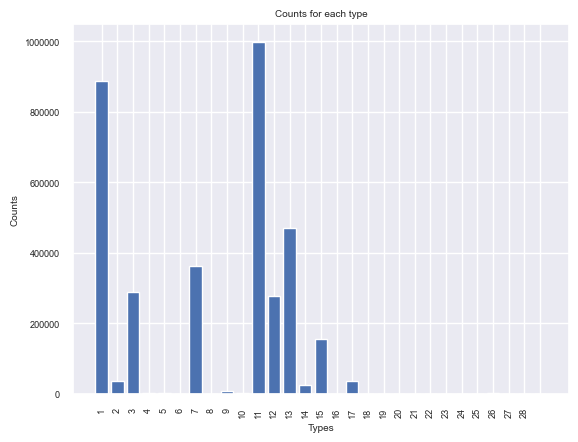

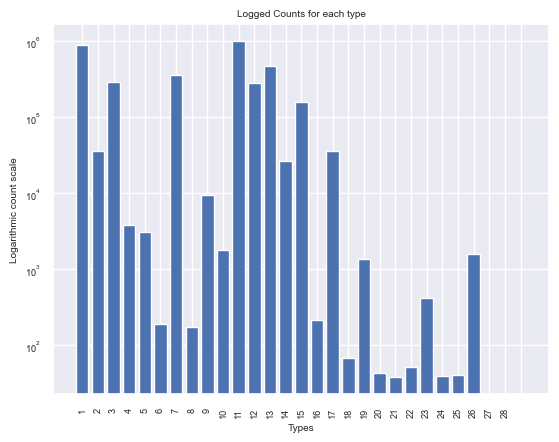

In [32]:
colNames = [col[5:] for col in cbt_df.columns]
vals = cbt_df.values[0]

# Plot regular counts
plt.bar(colNames, vals)
plt.xticks(rotation = 90) 
plt.xlabel('Types')
plt.ylabel('Counts')
plt.title('Counts for each type')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

# Plot logged counts
plt.bar(colNames, cbt_df.values[0])
plt.xticks(rotation = 90) 
plt.ticklabel_format(axis="y", style='plain')
plt.yscale('log')
plt.xlabel('Types')
plt.ylabel('Logarithmic count scale')
plt.title('Logged Counts for each type')
plt.show()

# Visualize Counts for each Type by Survey

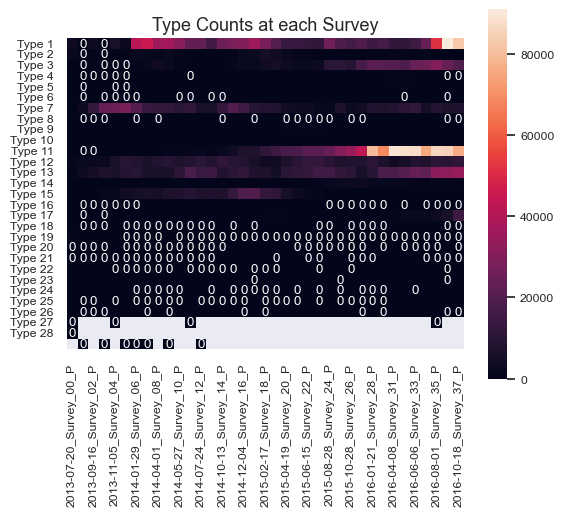

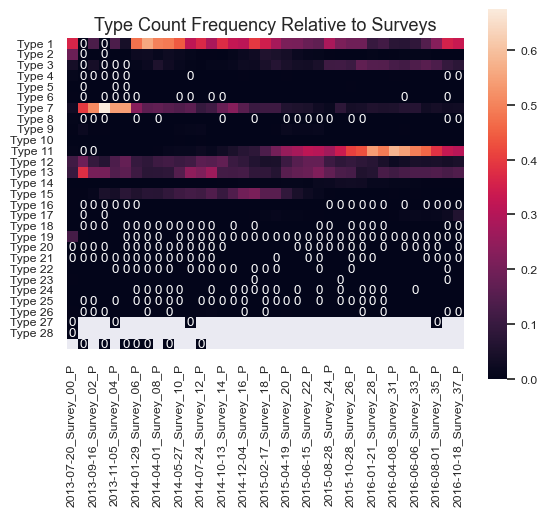

In [28]:
# Type counts at each survey
sns.set(font_scale=.8)
ax = sns.heatmap(cbs_df, square=True, annot=True)
for t in ax.texts:
    if float(t.get_text())==0:
        t.set_text(t.get_text()) 
    else:
        t.set_text("") 
plt.title('Type Counts at each Survey', fontsize=13)
plt.show()

# Type counts relative to total survey count
normd_cbs_df = cbs_df.div(cbs_df.sum(axis=0), axis=1)
ax = sns.heatmap(normd_cbs_df, square=True, annot=True)
for t in ax.texts:
    if float(t.get_text())==0:
        t.set_text(t.get_text()) 
    else:
        t.set_text("") 
plt.title('Type Count Frequency Relative to Surveys', fontsize=13)
plt.show()

# Patches by Surveys

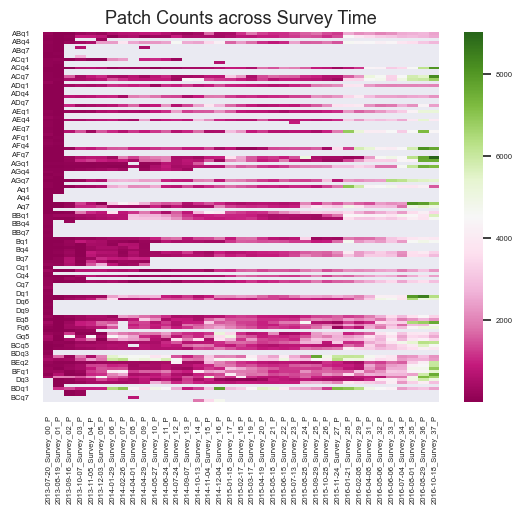

In [29]:
# Show total counts for each patch across Survey time
sns.set(font_scale=.5)
ax = sns.heatmap(ps_df, cmap="PiYG", annot=True)
for t in ax.texts:
    if float(t.get_text())==0:
        t.set_text(t.get_text()) 
    else:
        t.set_text("") 
plt.title('Patch Counts across Survey Time', fontsize=13)
plt.show()

# Dropping Null Patches
#### Certain patches were initially counted, but then dropped because of time consumption. Visualizing only non-null patches and excluding surveys_00 and _01, due to most patches created during those times were discontinued.

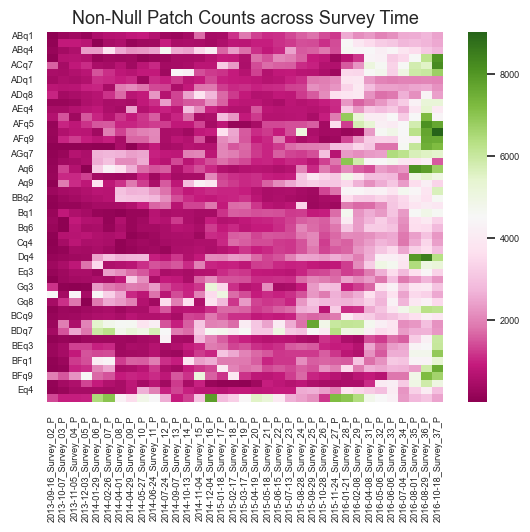

In [30]:
dropped_ps_df = ps_df.drop(columns=['2013-07-20_Survey_00_P', '2013-08-19_Survey_01_P'])
dropped_ps_df = dropped_ps_df.dropna(axis=0)

sns.set(font_scale=.6)
ax = sns.heatmap(dropped_ps_df, cmap="PiYG", annot=True)
for t in ax.texts:
    if float(t.get_text())==0:
        t.set_text(t.get_text()) 
    else:
        t.set_text("") 
plt.title('Non-Null Patch Counts across Survey Time', fontsize=13)
plt.show()